In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz as gviz
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import warnings as w

In [30]:
w.filterwarnings('ignore')

In [31]:
data = pd.read_csv('car-prices.csv')
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [32]:
swap = {
    'no' : 0,
    'yes' : 1
}

data['sold'] = data['sold'].map(swap)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [33]:
data['age_model'] = dt.today().year - data['model_year']
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,age_model
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [34]:
data['km_per_year'] = data['mileage_per_year'] * 1.60934
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,age_model,km_per_year
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [35]:
data = data.drop(columns=['Unnamed: 0', 'mileage_per_year', 'model_year'], axis=1)
data.head()

,price,sold,age_model,km_per_year
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [36]:
X = data[['price', 'age_model', 'km_per_year']]
y = data['sold']
np.random.seed(5)

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=.25,  
    stratify=y
)

print(f'We will train the model with {X_train.shape[0]} elements and will test with {X_test.shape[0]} elements')

model = LinearSVC(random_state=5)
model.fit(X_train, y_train)
y_expected = model.predict(X_test)

accuracy = accuracy_score(y_test, y_expected)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

We will train the model with 7500 elements and will test with 2500 elements
Accuracy of the model: 47.24%


In [40]:
dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(X_train, y_train)
accuracy = dummy_stratified.score(X_test, y_test) * 100
print(f'Accuracy of the model: {accuracy:.2f}%')

Accuracy of the model: 51.28%


In [41]:
dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(X_train, y_train)
accuracy = dummy_most_frequent.score(X_test, y_test) * 100
print(f'Accuracy of the model: {accuracy:.2f}%')

Accuracy of the model: 58.00%


In [42]:
np.random.seed(5)

raw_X_train, raw_X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=.25, 
    stratify=y
)

print(f'We will train the model with {X_train.shape[0]} elements and will test with {X_test.shape[0]} elements')

scaler = StandardScaler()
scaler.fit(raw_X_train)
X_train = scaler.transform(raw_X_train)
X_test = scaler.transform(raw_X_test)

model = SVC(gamma='auto')
model.fit(X_train, y_train)
y_expected = model.predict(X_test)

accuracy = accuracy_score(y_test, y_expected)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

We will train the model with 7500 elements and will test with 2500 elements
Accuracy of the model: 77.48%


In [58]:
np.random.seed(5)

raw_X_train, raw_X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=.25, 
    stratify=y
)

print(f'We will train the model with {X_train.shape[0]} elements and will test with {X_test.shape[0]} elements')

model = DecisionTreeClassifier(max_depth=3)
model.fit(raw_X_train, y_train)
y_expected = model.predict(raw_X_test)

accuracy = accuracy_score(y_test, y_expected)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

We will train the model with 7500 elements and will test with 2500 elements
Accuracy of the model: 79.28%


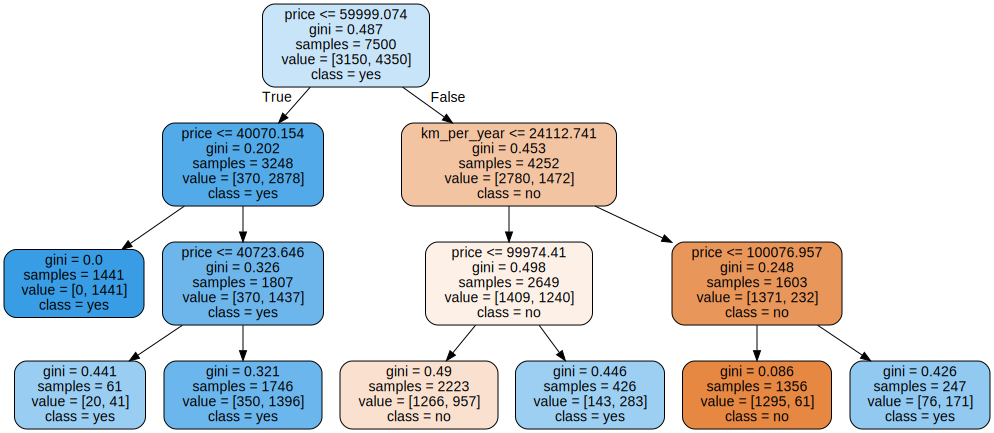

In [59]:
features = X.columns
dot_data = export_graphviz(
    model, 
    out_file=None, 
    feature_names=features, 
    filled=True, 
    rounded=True,
    class_names=['no', 'yes']
)
chart = gviz.Source(dot_data)
chart